<p><font size="6"><b>04 - Pandas: Working with time series data</b></font></p>

> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
# %matplotlib notebook
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.options.display.max_rows = 8

# Introduction: `datetime` module

Standard Python contains the `datetime` module to handle date and time data:

In [2]:
import datetime

In [3]:
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

datetime.datetime(2016, 12, 19, 13, 30)

In [4]:
print(dt) # .day,...

2016-12-19 13:30:00


In [5]:
print(dt.strftime("%d %B %Y"))

19 December 2016


# Dates and times in pandas

## The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but provide some more functionality to work with.  

The `Timestamp` object can also be constructed from a string:

In [6]:
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month (experiment with tab completion!):

In [7]:
ts.month

12

There is also a `Timedelta` type, which can e.g. be used to add intervals of time:

In [8]:
ts + pd.Timedelta('5 days')

Timestamp('2016-12-24 00:00:00')

## Parsing datetime strings 

![](http://imgs.xkcd.com/comics/iso_8601.png)


Unfortunately, when working with real world data, you encounter many different `datetime` formats. Most of the time when you have to deal with them, they come in text format, e.g. from a `CSV` file. To work with those data in Pandas, we first have to *parse* the strings to actual `Timestamp` objects.

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

To convert string formatted dates to Timestamp objects: use the `pandas.to_datetime` function
</div>



In [9]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [10]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [11]:
pd.to_datetime("09/12/2016", dayfirst=True)

Timestamp('2016-12-09 00:00:00')

In [12]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

A detailed overview of how to specify the `format` string, see the table in the python documentation: https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior

## `Timestamp` data in a Series or DataFrame column

In [13]:
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09, 11:00:00', '2016-12-09 12:00:00'])

In [14]:
s

0     2016-12-09 10:00:00
1    2016-12-09, 11:00:00
2     2016-12-09 12:00:00
dtype: object

The `to_datetime` function can also be used to convert a full series of strings:

In [15]:
ts = pd.to_datetime(s)

In [16]:
ts

0   2016-12-09 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

Notice the data type of this series has changed: the `datetime64[ns]` dtype. This indicates that we have a series of actual datetime values.

The same attributes as on single `Timestamp`s are also available on a Series with datetime data, using the **`.dt`** accessor:

In [17]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [18]:
ts.dt.weekday

0    4
1    4
2    4
dtype: int64

To quickly construct some regular time series data, the [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function comes in handy:

In [19]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3H'))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
            ...        
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
Length: 10, dtype: datetime64[ns]

# Time series data: `Timestamp` in the index

## River discharge example data

For the following demonstration of the time series functionality, we use a sample of discharge data of the Maarkebeek (Flanders) with 3 hour averaged values, derived from the [Waterinfo website](https://www.waterinfo.be/).

In [20]:
data = pd.read_csv("../data/vmm_flowdata.csv")

In [21]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


We already know how to parse a date column with Pandas:

In [22]:
data['Time'] = pd.to_datetime(data['Time'])

With `set_index('datetime')`, we set the column with datetime values as the index, which can be done by both `Series` and `DataFrame`.

In [23]:
data = data.set_index("Time")

In [24]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


The steps above are provided as built-in functionality of `read_csv`:

In [25]:
data = pd.read_csv("../data/vmm_flowdata.csv", index_col=0, parse_dates=True)

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

`pd.read_csv` provides a lot of built-in functionality to support this kind of transactions when reading in a file! Check the help of the read_csv function...
</div>

## The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [26]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [27]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
           dtype='int64', name='Time', length=11697)

In [28]:
data.index.dayofyear

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
            ...
            366,   1,   1,   1,   1,   1,   1,   1,   1,   2],
           dtype='int64', name='Time', length=11697)

In [29]:
data.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='Time', length=11697)

The `plot` method will also adapt it's labels (when you zoom in, you can see the different levels of detail of the datetime labels):


In [30]:
# %matplotlib notebook

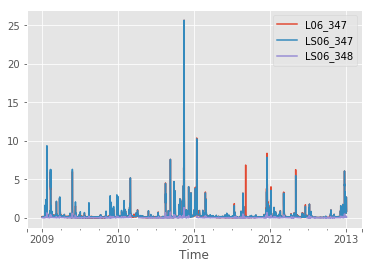

In [31]:
data.plot()

We have to much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

## Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [32]:
data[pd.Timestamp("2012-01-01 09:00"):pd.Timestamp("2012-01-01 19:00")]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


But, for convenience, indexing a time series also works with strings:

In [33]:
data["2012-01-01 09:00":"2012-01-01 19:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2013:

In [34]:
data['2013']

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Normally you would expect this to access a column named '2013', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2012:

In [35]:
data['2012-01':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
...,...,...,...
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500
2012-03-31 18:00:00,0.085750,0.121417,0.011000
2012-03-31 21:00:00,0.068417,0.119750,0.010417


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data starting from 2012</li>
</ul>
</div>

In [36]:
data['2012':]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in January for all different years</li>
</ul>
</div>

In [37]:
data[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in April, May and June for all different years</li>
</ul>
</div>

In [38]:
data[data.index.month.isin([4, 5, 6])]

,L06_347,LS06_347,LS06_348
Time,,,
2009-04-01 00:00:00,0.270417,0.233500,0.031250
2009-04-01 03:00:00,0.249917,0.247083,0.030750
2009-04-01 06:00:00,0.278167,0.260083,0.032583
2009-04-01 09:00:00,0.324833,0.301583,0.034250
...,...,...,...
2012-06-30 12:00:00,0.288000,0.061417,0.006333
2012-06-30 15:00:00,0.287583,0.063083,0.004833
2012-06-30 18:00:00,0.287000,0.080917,0.028167
2012-06-30 21:00:00,0.287000,0.087000,0.010000


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all 'daytime' data (between 8h and 20h) for all days</li>
</ul>
</div>

In [39]:
data[(data.index.hour > 8) & (data.index.hour < 20)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250
...,...,...,...
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [40]:
data.resample('D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


Other mathematical methods can also be specified:

In [41]:
data.resample('D').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

    The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases <br><br>
            
    These strings can also be combined with numbers, eg `'10D'`...

</div>



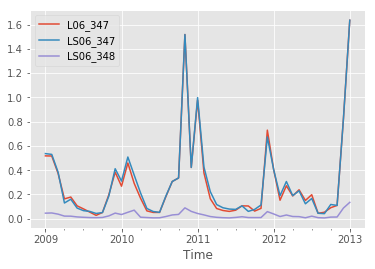

In [42]:
data.resample('M').mean().plot() # 10D

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly standard deviation of the columns</li>
</ul>
</div>

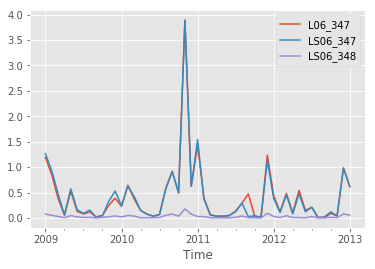

In [43]:
data.resample('M').std().plot() # 'A'

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly mean and median values for the years 2011-2012 for 'L06_347'<br><br></li>
</ul>
    
    **Note** <br>You can create a new figure with `fig, ax = plt.subplots()` and add each of the plots to the created `ax` object (see documentation of pandas plot function)
</div>

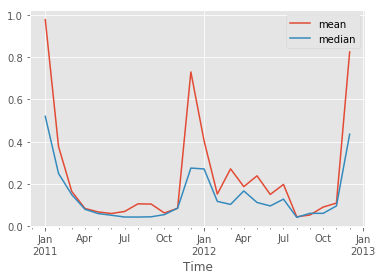

In [44]:
fig, ax = plt.subplots()
data.loc['2011':'2012', 'L06_347'].resample('M').mean().plot(ax=ax)
data.loc['2011':'2012', 'L06_347'].resample('M').median().plot(ax=ax)
ax.legend(["mean", "median"])

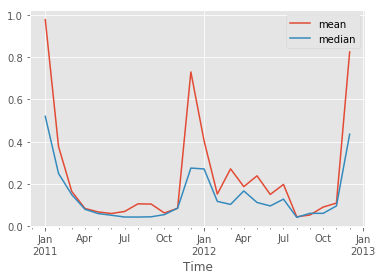

In [45]:
data.loc['2011':'2012', 'L06_347'].resample('M').agg(['mean', 'median']).plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly mininum and maximum daily average value of the 'LS06_348' column</li>
</ul>
</div>

In [46]:
daily = data['LS06_348'].resample('D').mean() # daily averages calculated

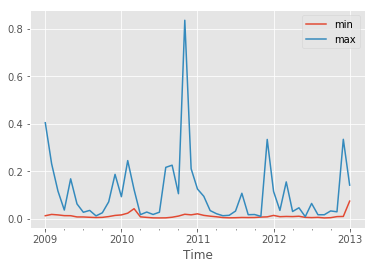

In [47]:
daily.resample('M').agg(['min', 'max']).plot() # monthly minimum and maximum values of these daily averages

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>make a bar plot of the mean of the stations in year of 2013 (Remark: create a `fig, ax = plt.subplots()` object and add the plot to the created ax</li>
</ul>

</div>

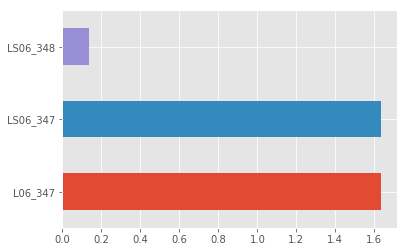

In [48]:
fig, ax = plt.subplots()
data['2013'].mean().plot(kind='barh', ax=ax)